# Note on INTEGRAL time systems

This is a short notice about using correct timing with INTEGRAL.

One should distinguish the time correction due to different time-systems (different clocks) and due to different locations of signal registration.
Correction for time of arrival

As indicated here: http://isdc.unige.ch/integral/support/glossary#ijd, INTEGRAL IJD, used in all OSA products to describe time as float, is in TT.

TT = TAI+32.184s 
UTC is offset from TAI by fixed amount.

UT0,1,2 are irregular and defined by observatories.
UTC is defined by atomic clocks.

UT is ambigious and may usually refer to UT1 or UTC.

UT1 is defined by BIPM

https://www.bipm.org/fr/about-us/

https://www.nist.gov/pml/time-and-frequency-division/atomic-standards/leap-second-and-ut1-utc-information

## Recommendation

I would put all times in UTC at geocenter, possibly with some exceptions, clearly distinguished.

UTC can be securely converted to IJD with converttime.

online:

https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem/api/v1.0/converttime/UTC/2020-04-28T14:34:33/IJD


## Extra notes

https://www.stjarnhimlen.se/comp/time.html


# Precision of INTEGRAL on-board timing

https://iachec.org/wp-content/presentations/2018/Kuiper_SessionXI.pdf

and the latest published reference (also by Lucien):

https://www.aanda.org/articles/aa/pdf/2003/43/aaINTEGRAL71.pdf

In [107]:
import requests
import astropy.io.fits as fits
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import astropy.units as u
import astropy.constants as const

# Relativistic effects on timing

In [117]:
orbit = fits.open("/mnt/sshfs/cdcihn/isdc/arc/rev_3/aux/adp/2121.001/orbit_historic.fits.gz")
t1=orbit[1].data['DAYBEG']*u.day
t2=orbit[1].data['DAYEND']*u.day
xyz = orbit[1].data['XYZPOS']*u.km

In [63]:
v_r = np.sum((xyz[1:]-xyz[:-1])**2, 1)**0.5 / ((t2-t1)[:-1])
beta = (v_r/const.c).si.value

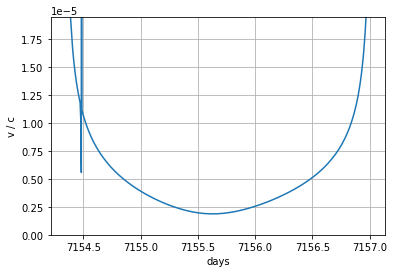

In [112]:
plt.figure()

plt.plot(t1[:-1], beta)
plt.ylim([0, np.percentile(beta,0.999)*10])

plt.ylabel("v / c")
plt.xlabel("days")
plt.grid()

In [113]:
gamma = (1-beta**2)**0.5
(u.year/gamma - 1*u.year).to(u.ms)

<Quantity [1.33136421e+01, 1.32827684e+01, 1.33743385e+01, 1.33545221e+01,
           1.33403536e+01, 1.33317698e+01, 1.33290229e+01, 1.34491893e+01,
           1.33396879e+01, 1.33536322e+01, 1.33730211e+01, 1.33980788e+01,
           1.33117712e+01, 1.33479213e+01, 1.33897473e+01, 1.33207965e+01,
           1.32581311e+01, 1.33166062e+01, 1.32657059e+01, 1.32212102e+01,
           1.31827057e+01, 1.32630432e+01, 1.31244479e+01, 1.31041691e+01,
           1.32010225e+01, 1.30823767e+01, 1.29721255e+01, 1.30847521e+01,
           1.28809759e+01, 1.30039311e+01, 1.28164677e+01, 1.28457647e+01,
           1.27780332e+01, 1.28195788e+01, 1.26653155e+01, 1.26198948e+01,
           1.25818948e+01, 1.25506497e+01, 1.24316675e+01, 1.24156071e+01,
           1.24065888e+01, 1.23125943e+01, 1.22278563e+01, 1.21521786e+01,
           1.20853510e+01, 1.20269390e+01, 1.19769637e+01, 1.18530975e+01,
           1.18207313e+01, 1.17168566e+01, 1.16235488e+01, 1.16167028e+01,
           1.14672954e+01

INTEGRAL lives 13 ms per year longer than ground observer

In [116]:
(u.day/gamma - 1*u.day).to(u.microsecond)

<Quantity [3.64507656e+01, 3.63662380e+01, 3.66169431e+01, 3.65626889e+01,
           3.65238975e+01, 3.65003963e+01, 3.64928759e+01, 3.68218736e+01,
           3.65220750e+01, 3.65602524e+01, 3.66133364e+01, 3.66819407e+01,
           3.64456433e+01, 3.65446169e+01, 3.66591301e+01, 3.64703531e+01,
           3.62987848e+01, 3.64588807e+01, 3.63195234e+01, 3.61977008e+01,
           3.60922812e+01, 3.63122332e+01, 3.59327800e+01, 3.58772596e+01,
           3.61424298e+01, 3.58175953e+01, 3.55157439e+01, 3.58240989e+01,
           3.52661900e+01, 3.56028231e+01, 3.50895760e+01, 3.51697871e+01,
           3.49843482e+01, 3.50980940e+01, 3.46757439e+01, 3.45513889e+01,
           3.44473506e+01, 3.43618062e+01, 3.40360508e+01, 3.39920796e+01,
           3.39673889e+01, 3.37100460e+01, 3.34780459e+01, 3.32708517e+01,
           3.30878876e+01, 3.29279644e+01, 3.27911394e+01, 3.24520123e+01,
           3.23633984e+01, 3.20790051e+01, 3.18235422e+01, 3.18047988e+01,
           3.13957436e+01

# Relativisitc abberation effect on source position

$cos(\theta_o) = \frac{cos(\theta_s) - \beta}{1 - \beta cos(\theta_s)}$

the effect is small but measurble, around 0.1 arcmin 10% of the time.
compare to 12 arcmin ISGRI PSF and 3 arcmin of JEM-X, bright sources would be affected.

Presumably, this is automatically corrected since star trackers are affected in the same way.
There is also a similar effect with position dependency on the position in FoV, but this effect is even smaller.


In [90]:
theta = np.pi/2.

d_theta = (np.arccos((np.cos(theta) - beta)/(1-beta*np.cos(theta))) - theta)/np.pi*180*60

np.quantile(d_theta,0.9)

0.09906253972114772